In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('customer-churn.csv')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)

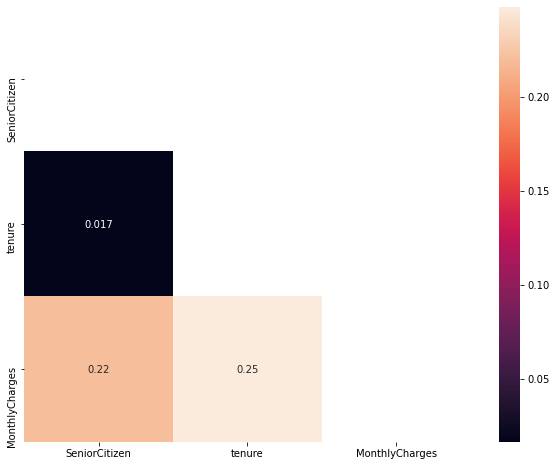

In [6]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [7]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
contract_dict = {'Month-to-month':1, 'One year':2, 'Two year':3}
data['Contract'] = data['Contract'].map(contract_dict)

In [9]:
data['Contract']

0       1
1       2
2       1
3       2
4       1
       ..
7038    2
7039    2
7040    1
7041    1
7042    3
Name: Contract, Length: 7043, dtype: int64

In [10]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
def change_partner(x):
    if x in ['Yes']:
        return '1'
    else:
        return '0'

data['Partner'] = list(map(change_partner, data['Partner'] ))

In [12]:
data['Partner'].head()

0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: object

In [13]:
 data['Partner'] = data['Partner'].astype('int64')

In [14]:
data['Partner'].head()

0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: int64

In [15]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,No,No,Yes,No,No,No,No,1,29.85,29.85,No
1,Male,0,0,No,34,Yes,Yes,No,Yes,No,No,No,2,56.95,1889.5,No
2,Male,0,0,No,2,Yes,Yes,Yes,No,No,No,No,1,53.85,108.15,Yes
3,Male,0,0,No,45,No,Yes,No,Yes,Yes,No,No,2,42.30,1840.75,No
4,Female,0,0,No,2,Yes,No,No,No,No,No,No,1,70.70,151.65,Yes


In [16]:
data['TechSupport'].value_counts()


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [17]:
inputData = data[['tenure', 'SeniorCitizen','MonthlyCharges','Partner','Contract']]

In [18]:
target=data[["Churn"]]


In [19]:
inputData.head()


,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract
0,1,0,29.85,1,1
1,34,0,56.95,0,2
2,2,0,53.85,0,1
3,45,0,42.30,0,2
4,2,0,70.70,0,1


In [20]:
inputData.shape


(7043, 5)

In [21]:
target.shape


(7043, 1)

In [22]:
data['Partner']=list(map(change_partner, data['Partner']))


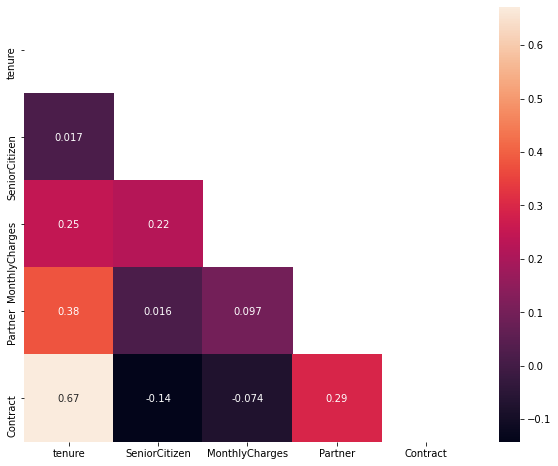

In [23]:

correlations_matrix = inputData.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [24]:
inputData.describe()


,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692,0.483033,1.690473
std,24.559481,0.368612,30.090047,0.499748,0.833755
min,0.000000,0.000000,18.250000,0.000000,1.000000
25%,9.000000,0.000000,35.500000,0.000000,1.000000
50%,29.000000,0.000000,70.350000,0.000000,1.000000
75%,55.000000,0.000000,89.850000,1.000000,2.000000
max,72.000000,1.000000,118.750000,1.000000,3.000000


## Standard scaler

In [25]:
transformer = StandardScaler().fit(inputData)
scaled_x = transformer.transform(inputData)


In [26]:
pd.DataFrame(scaled_x).head()


,0,1,2,3,4
0,-1.277445,-0.439916,-1.160323,1.034530,-0.828207
1,0.066327,-0.439916,-0.259629,-0.966622,0.371271
2,-1.236724,-0.439916,-0.362660,-0.966622,-0.828207
3,0.514251,-0.439916,-0.746535,-0.966622,0.371271
4,-1.236724,-0.439916,0.197365,-0.966622,-0.828207


## First try without balancing anything


In [60]:
Y= data[["Churn"]]



In [65]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, Y)
                        
print("The accuracy of the model is: ",round(classification.score(scaled_x, Y),2))

The accuracy of the model is:  0.79


In [62]:
print("The kappa of the model is: ",round(cohen_kappa_score(target,classification.predict(scaled_x)),2))


The kappa of the model is:  0.43


In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [86]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(scaled_x, Y)
prob_pred = model.predict_proba(scaled_x)
print("The accuracy of the model is: {:4.2f}".format(model.score(scaled_x, Y)))

The accuracy of the model is: 0.85


### CROSS VALIDATION

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import t, norm

In [81]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

In [82]:
model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']


def confidence_intervals(model_pipeline, model_names, scaled_x, Y, alpha = 0.05, K = 10):
# We set the significance level
#alpha = 0.05
#K = 10
    scores = {}
    i=0
    for model in model_pipeline:
        mean_score = np.mean(cross_val_score(model, scaled_x, Y, cv=K))
        if (K < 30):
            # t.ppf(area) gives us the critical value corresponding to the area for the t-student distribution.
            t_critical = abs(t.ppf(1-alpha/2, K-1)) 
            interval = t_critical*(np.std(cross_val_score(model, scaled_x, Y, cv=K))/np.sqrt(K))
        else:
            # norm.ppf(area) gives us the critical value corresponding to the area for the normal distribution
            z_critical = abs(norm.ppf(1-alpha/2)) 
            interval = z_critical*(np.std(cross_val_score(model, scaled_x, y_train, cv=K))/np.sqrt(K))
        scores[model_names[i]] = [mean_score, mean_score - interval, mean_score + interval]
        print("The rmse of the {} model is (CV witk K={}) = {:4.2f} +/- {:4.2f}".format(model_names[i], K, mean_score, interval))
        i = i+1

confidence_intervals(model_pipeline, model_names, scaled_x, Y, 0.05, 5)

The rmse of the Classification Tree model is (CV witk K=5) = 0.72 +/- 0.01
The rmse of the Logistic Regression model is (CV witk K=5) = 0.79 +/- 0.01
The rmse of the KNN model is (CV witk K=5) = 0.78 +/- 0.01


## Downsampeling

In [31]:
rus = RandomUnderSampler()


X_rus, y_rus = rus.fit_sample(scaled_x, Y)

In [32]:
pd.DataFrame(y_rus).value_counts()


Churn
Yes      1869
No       1869
dtype: int64

In [33]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus, y_rus)
                        
print("The accuracy of the model is: ",round(classification.score(X_rus, y_rus),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus,classification.predict(X_rus)),2))

The accuracy of the model is:  0.76
The kappa of the model is:  0.51


In [87]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_rus, y_rus)
prob_pred = model.predict_proba(X_rus)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_rus, y_rus)))

The accuracy of the model is: 0.85


## Oversampling


In [34]:
ros = RandomOverSampler()


In [35]:
X_ros, y_ros = ros.fit_sample(scaled_x, Y)


In [36]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_ros, y_ros)
                        
print("The accuracy of the model is: ",round(classification.score(X_ros, y_ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_ros,classification.predict(X_ros)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


In [37]:
y_ros.value_counts()


Churn
Yes      5174
No       5174
dtype: int64

In [89]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_ros, y_ros)
prob_pred = model.predict_proba(X_ros)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_ros, y_ros)))

The accuracy of the model is: 0.84


## SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_sample(scaled_x, Y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [39]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


In [90]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_sm, y_sm)
prob_pred = model.predict_proba(X_sm)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_sm, y_sm)))

The accuracy of the model is: 0.83


## Tomek

In [40]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_sample(scaled_x, Y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4678
Yes      1869
dtype: int64

In [41]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)
                        
print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.47


In [91]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_tl, y_tl)
prob_pred = model.predict_proba(X_tl)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_tl, y_tl)))

The accuracy of the model is: 0.86


## Trying with SMOTE after Tomek


In [42]:
X_sm1, y_sm1 = smote.fit_sample(X_tl,y_tl)
pd.DataFrame(y_sm1).value_counts()

Churn
Yes      4678
No       4678
dtype: int64

In [43]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm1, y_sm1)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm1, y_sm1),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm1,classification.predict(X_sm1)),2))

The accuracy of the model is:  0.77
The kappa of the model is:  0.54


In [94]:
model = DecisionTreeClassifier(max_depth=4) #specify the depth is important otherwise your model could be overfitting 
model.fit(X_sm1, y_sm1)
prob_pred = model.predict_proba(X_sm1)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_sm1, y_sm1)))

The accuracy of the model is: 0.78


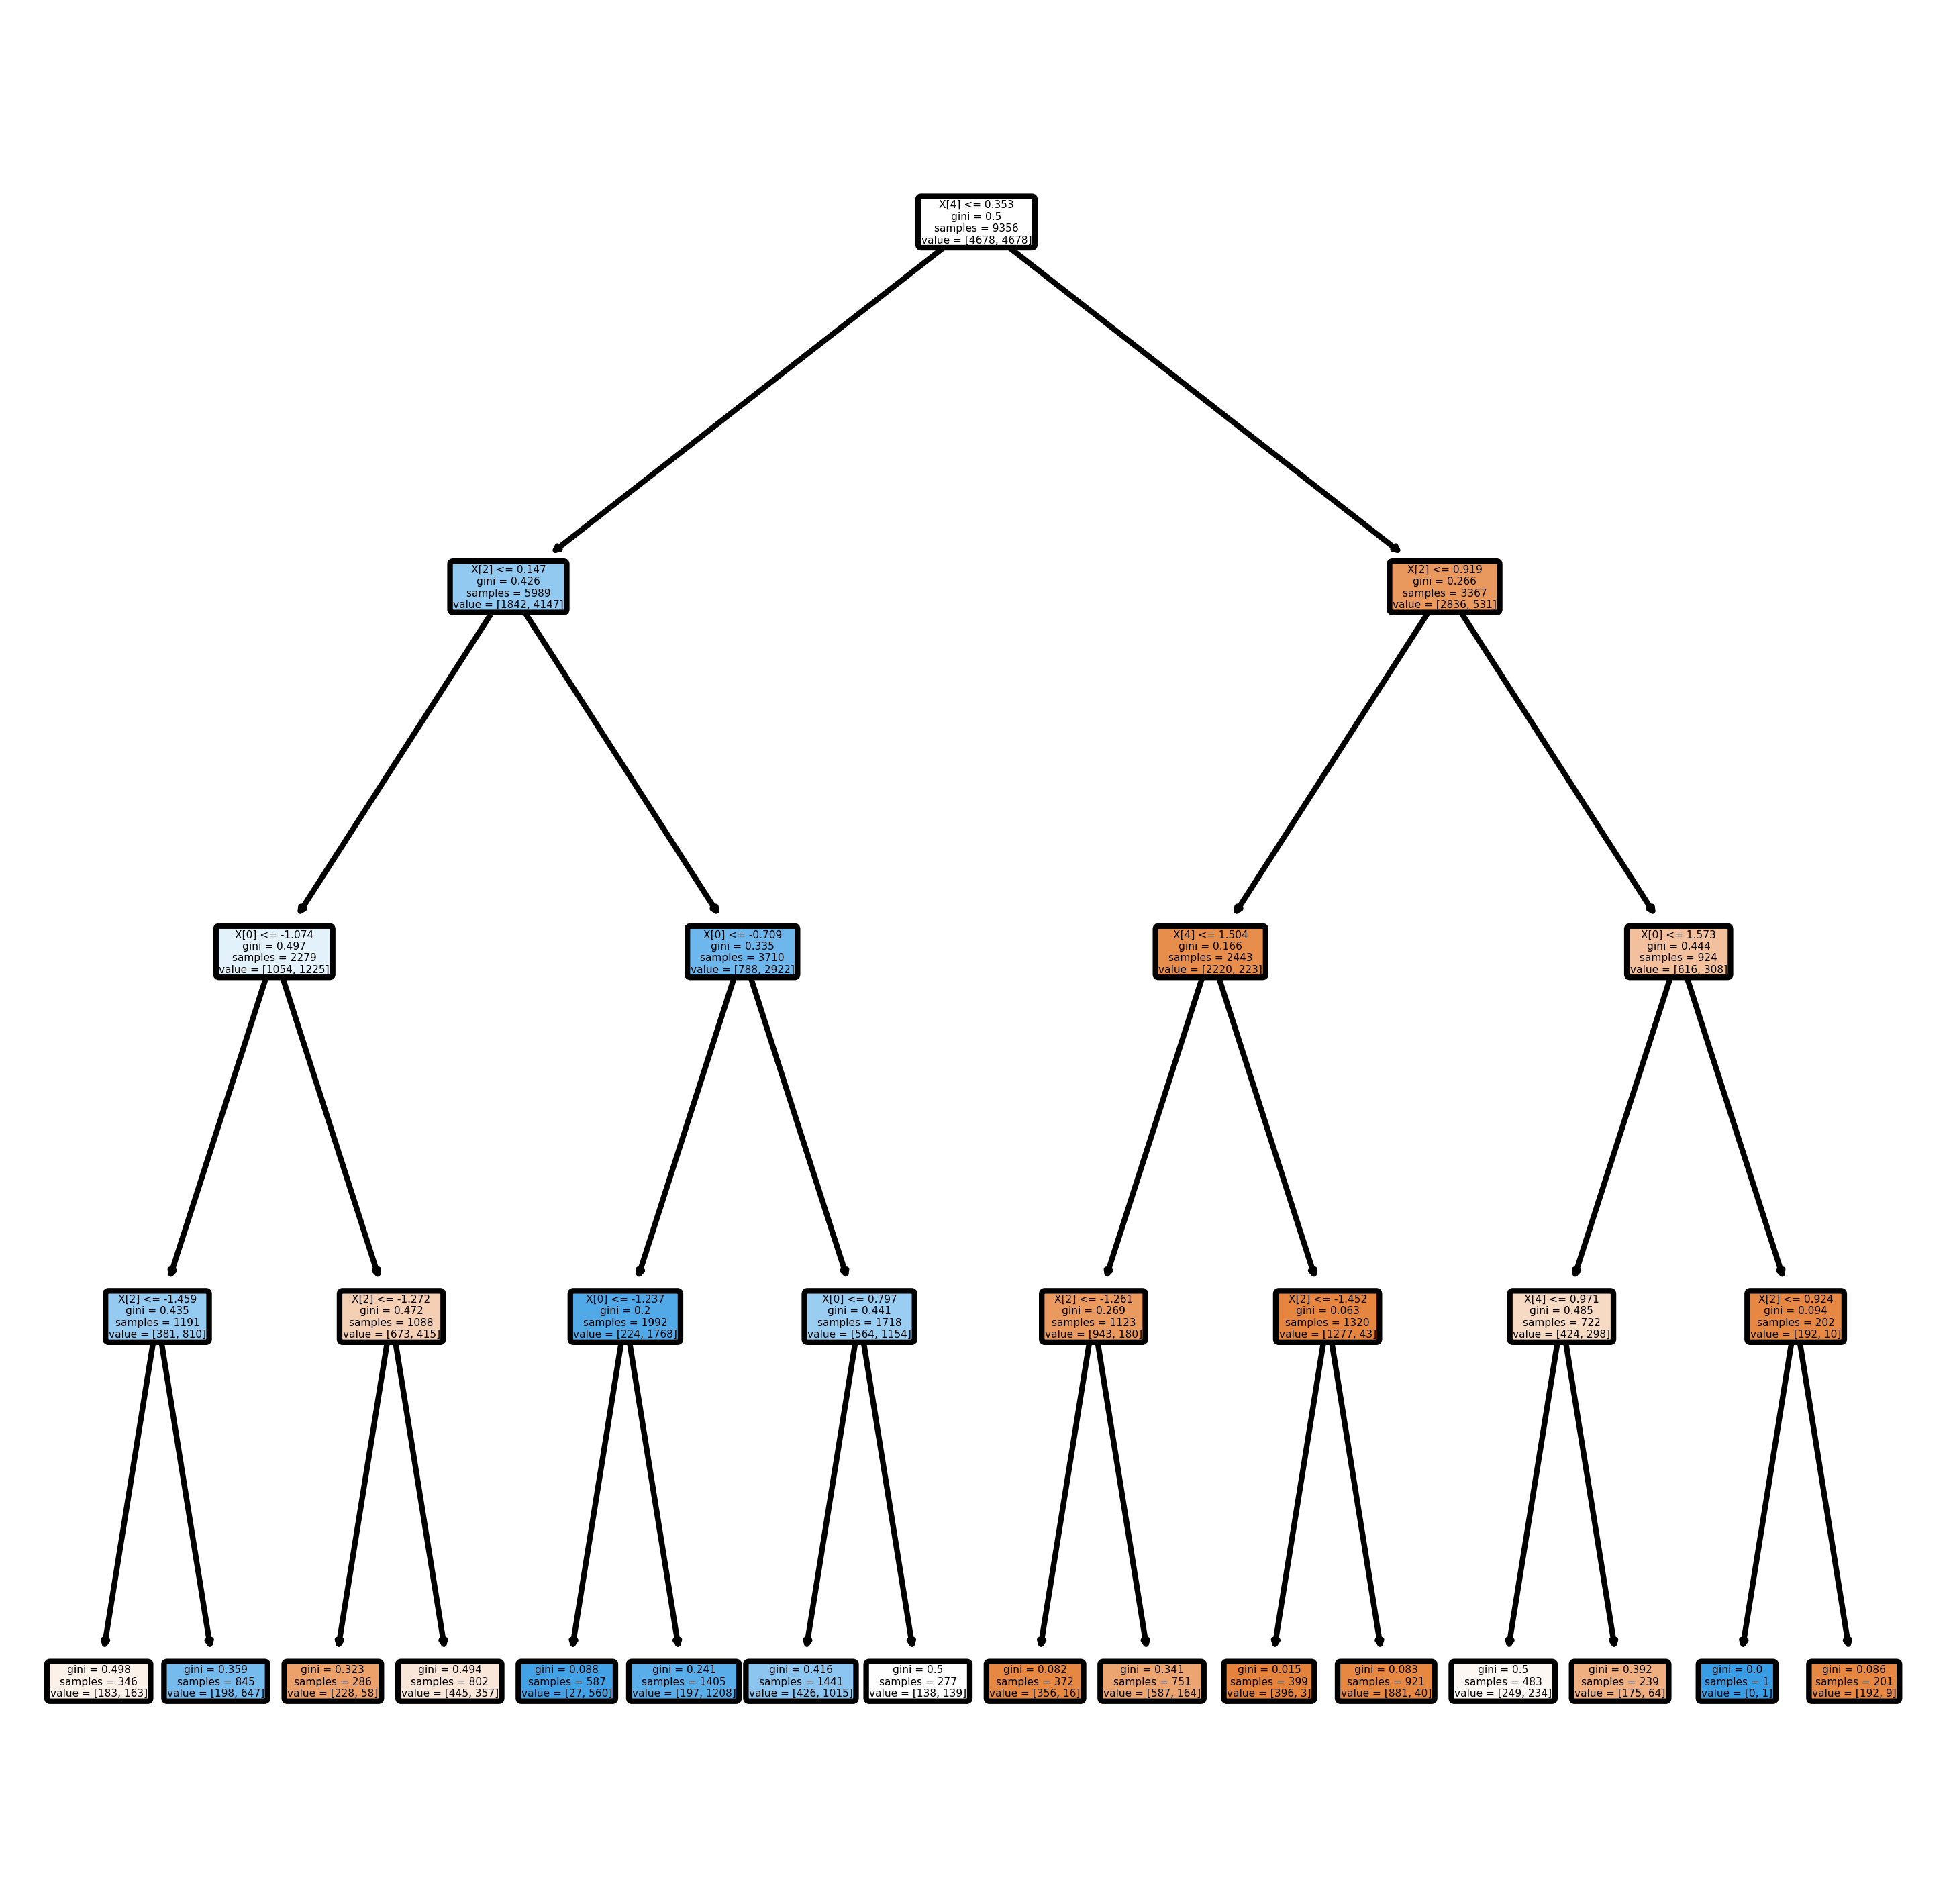

In [98]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)#dpi can be 300 or 600

plot_tree(model,filled = True, rounded=True)
plt.show() 

In [44]:
data['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [45]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
#churn_dict = {'No':0, 'Yes':1}
#data['Churn'] = data['Churn'].map(churn_dict)

In [47]:
#data['Churn'].unique()

In [48]:
df=pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)],axis=1)
df.columns =['tenure', 'SeniorCitizen','MonthlyCharges','Partner','Contract','Churn']

In [49]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [50]:
churn_dict = {'No':0, 'Yes':1}
df['Churn'] = df['Churn'].map(churn_dict)

In [51]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [52]:
df.head()


,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract,Churn
0,-1.277445,-0.439916,-1.160323,1.034530,-0.828207,0
1,0.066327,-0.439916,-0.259629,-0.966622,0.371271,0
2,-1.236724,-0.439916,-0.362660,-0.966622,-0.828207,1
3,0.514251,-0.439916,-0.746535,-0.966622,0.371271,0
4,-1.236724,-0.439916,0.197365,-0.966622,-0.828207,1


In [53]:
predictions = classification.predict(X_sm1)
classification.score(X_sm1, y_sm1)

0.7723386062419838

In [54]:
y_sm1.value_counts()


Churn
Yes      4678
No       4678
dtype: int64

In [55]:
confusion_matrix(y_sm1, predictions)

array([[3451, 1227],
       [ 903, 3775]], dtype=int64)

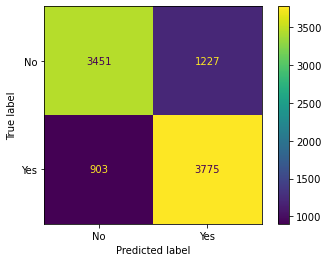

In [56]:
plot_confusion_matrix(classification, X_sm1, y_sm1)


In [57]:
X_sm1

array([[-1.27744458, -0.43991649, -1.16032292,  1.03453023, -0.8282069 ],
       [ 0.06632742, -0.43991649, -0.25962894, -0.96662231,  0.37127103],
       [-1.23672422, -0.43991649, -0.36266036, -0.96662231, -0.8282069 ],
       ...,
       [-0.35375768, -0.43991649,  0.4658791 , -0.96662231, -0.8282069 ],
       [-0.9548755 , -0.43991649, -1.15963871,  1.03453023, -0.8282069 ],
       [ 0.80003474,  2.27315869,  1.38789383,  1.03453023, -0.8282069 ]])

In [58]:
y_sm1

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
9351,Yes
9352,Yes
9353,Yes
9354,Yes


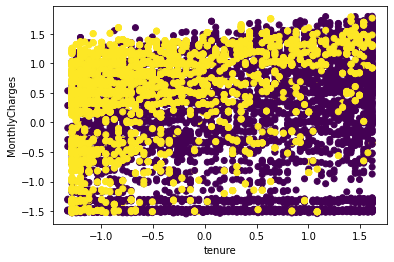

In [59]:
plt.scatter(df['tenure'], df['MonthlyCharges'], c = df['Churn'])
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.show()